In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from collections import Counter

import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Data Import

In [2]:
cnn_covid_cleaned = pd.read_csv (r'C:\Users\zach\cnn_covid_cleaned.csv')
cnn_covid_cleaned.head()

Unnamed: 0                                              title  \
0           0  Justice Department charges 5 people with helpi...   
1           1  White House will unveil new data-sharing initi...   
2           2                    Why 'Turning Red' gives me hope   
3           3  5 things to know for March 16: Ukraine, Pandem...   
4           4  Senate votes to repeal travel mask mandates in...   

                                              byline  \
0  By  Katelyn Polantz ,  Kara Scannell  and  Han...   
1                             By  John Harwood , CNN   
2                             Opinion by Vanessa Hua   
3                            By Alexandra Meeks, CNN   
4             By  Ali Zaslav  and  Ted Barrett , CNN   

                                      time  \
0  Updated 4:41 PM ET, Wed March 16, 2022    
1  Updated 5:09 AM ET, Tue March 15, 2022    
2  Updated 4:21 PM ET, Wed March 16, 2022    
3  Updated 6:44 AM ET, Wed March 16, 2022    
4  Updated 7:16 PM ET, Tue March 15, 2022    

                                             content        date month_year  
0   (cnn) the justice department has charged five...  2022-03-16    2022-03  
1   (cnn) the  biden white house , trying to expa...  2022-03-15    2022-03  
2  vanessa hua  is the author of the forthcoming ...  2022-03-16    2022-03  
3  get '5 things' in your inbox if your day doesn...  2022-03-16    2022-03  
4   (cnn) the senate on tuesday passed a resoluti...  2022-03-15    2022-03

In [3]:
cnn_covid_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  660 non-null    int64 
 1   title       660 non-null    object
 2   byline      660 non-null    object
 3   time        660 non-null    object
 4   content     660 non-null    object
 5   date        660 non-null    object
 6   month_year  660 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.2+ KB


In [4]:
cnn_ukraine_cleaned = pd.read_csv (r'C:\Users\zach\cnn_ukraine_cleaned.csv')
cnn_ukraine_cleaned.head()

Unnamed: 0                                              title  \
0           0  Russia moves to seize hundreds of planes from ...   
1           1  Zelensky taps national psyches of other countr...   
2           2  Rate hikes are here: What does that mean for you?   
3           3  Harris' deputy press secretary leaving her off...   
4           4     Russia says it made a payment to avoid default   

                                              byline  \
0  By  Chris Isidore  and Chris Liakos, CNN Business   
1               Analysis by  Stephen Collinson , CNN   
2                      By  Matt Egan ,  CNN Business   
3            By  Jasmine Wright  and Sam Fossum, CNN   
4                   By  David Goldman , CNN Business   

                                       time  \
0  Updated 12:02 AM ET, Thu March 17, 2022    
1   Updated 6:35 PM ET, Wed March 16, 2022    
2   Updated 6:36 PM ET, Wed March 16, 2022    
3  Updated 11:46 PM ET, Wed March 16, 2022    
4   Updated 9:36 PM ET, Wed March 16, 2022    

                                             content        date month_year  
0  new york (cnn business) russia is seizing hund...  2022-03-17    2022-03  
1  washington (cnn) this is president volodymr  z...  2022-03-16    2022-03  
2  new york (cnn business) the covid era of free ...  2022-03-16    2022-03  
3  washington (cnn) sabrina singh,  vice presiden...  2022-03-16    2022-03  
4  new york (cnn business) russia says it has ord...  2022-03-16    2022-03

In [5]:
cnn_ukraine_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  783 non-null    int64 
 1   title       783 non-null    object
 2   byline      783 non-null    object
 3   time        783 non-null    object
 4   content     783 non-null    object
 5   date        783 non-null    object
 6   month_year  783 non-null    object
dtypes: int64(1), object(6)
memory usage: 42.9+ KB


setting indexes prior to join

In [6]:
cnn_covid_cleaned.set_index('month_year').head()

Unnamed: 0                                              title  \
month_year                                                                  
2022-03              0  Justice Department charges 5 people with helpi...   
2022-03              1  White House will unveil new data-sharing initi...   
2022-03              2                    Why 'Turning Red' gives me hope   
2022-03              3  5 things to know for March 16: Ukraine, Pandem...   
2022-03              4  Senate votes to repeal travel mask mandates in...   

                                                       byline  \
month_year                                                      
2022-03     By  Katelyn Polantz ,  Kara Scannell  and  Han...   
2022-03                                By  John Harwood , CNN   
2022-03                                Opinion by Vanessa Hua   
2022-03                               By Alexandra Meeks, CNN   
2022-03                By  Ali Zaslav  and  Ted Barrett , CNN   

                                               time  \
month_year                                            
2022-03     Updated 4:41 PM ET, Wed March 16, 2022    
2022-03     Updated 5:09 AM ET, Tue March 15, 2022    
2022-03     Updated 4:21 PM ET, Wed March 16, 2022    
2022-03     Updated 6:44 AM ET, Wed March 16, 2022    
2022-03     Updated 7:16 PM ET, Tue March 15, 2022    

                                                      content        date  
month_year                                                                 
2022-03      (cnn) the justice department has charged five...  2022-03-16  
2022-03      (cnn) the  biden white house , trying to expa...  2022-03-15  
2022-03     vanessa hua  is the author of the forthcoming ...  2022-03-16  
2022-03     get '5 things' in your inbox if your day doesn...  2022-03-16  
2022-03      (cnn) the senate on tuesday passed a resoluti...  2022-03-15

In [7]:
cnn_ukraine_cleaned.set_index('month_year').head()

Unnamed: 0                                              title  \
month_year                                                                  
2022-03              0  Russia moves to seize hundreds of planes from ...   
2022-03              1  Zelensky taps national psyches of other countr...   
2022-03              2  Rate hikes are here: What does that mean for you?   
2022-03              3  Harris' deputy press secretary leaving her off...   
2022-03              4     Russia says it made a payment to avoid default   

                                                       byline  \
month_year                                                      
2022-03     By  Chris Isidore  and Chris Liakos, CNN Business   
2022-03                  Analysis by  Stephen Collinson , CNN   
2022-03                         By  Matt Egan ,  CNN Business   
2022-03               By  Jasmine Wright  and Sam Fossum, CNN   
2022-03                      By  David Goldman , CNN Business   

                                                time  \
month_year                                             
2022-03     Updated 12:02 AM ET, Thu March 17, 2022    
2022-03      Updated 6:35 PM ET, Wed March 16, 2022    
2022-03      Updated 6:36 PM ET, Wed March 16, 2022    
2022-03     Updated 11:46 PM ET, Wed March 16, 2022    
2022-03      Updated 9:36 PM ET, Wed March 16, 2022    

                                                      content        date  
month_year                                                                 
2022-03     new york (cnn business) russia is seizing hund...  2022-03-17  
2022-03     washington (cnn) this is president volodymr  z...  2022-03-16  
2022-03     new york (cnn business) the covid era of free ...  2022-03-16  
2022-03     washington (cnn) sabrina singh,  vice presiden...  2022-03-16  
2022-03     new york (cnn business) russia says it has ord...  2022-03-16

Joining dataframes at the index

In [8]:
cnn_combined = pd.concat([cnn_covid_cleaned,cnn_ukraine_cleaned], sort=False)
cnn_combined.head()

Unnamed: 0                                              title  \
0           0  Justice Department charges 5 people with helpi...   
1           1  White House will unveil new data-sharing initi...   
2           2                    Why 'Turning Red' gives me hope   
3           3  5 things to know for March 16: Ukraine, Pandem...   
4           4  Senate votes to repeal travel mask mandates in...   

                                              byline  \
0  By  Katelyn Polantz ,  Kara Scannell  and  Han...   
1                             By  John Harwood , CNN   
2                             Opinion by Vanessa Hua   
3                            By Alexandra Meeks, CNN   
4             By  Ali Zaslav  and  Ted Barrett , CNN   

                                      time  \
0  Updated 4:41 PM ET, Wed March 16, 2022    
1  Updated 5:09 AM ET, Tue March 15, 2022    
2  Updated 4:21 PM ET, Wed March 16, 2022    
3  Updated 6:44 AM ET, Wed March 16, 2022    
4  Updated 7:16 PM ET, Tue March 15, 2022    

                                             content        date month_year  
0   (cnn) the justice department has charged five...  2022-03-16    2022-03  
1   (cnn) the  biden white house , trying to expa...  2022-03-15    2022-03  
2  vanessa hua  is the author of the forthcoming ...  2022-03-16    2022-03  
3  get '5 things' in your inbox if your day doesn...  2022-03-16    2022-03  
4   (cnn) the senate on tuesday passed a resoluti...  2022-03-15    2022-03

Re-setting Index

In [9]:
cnn_combined.set_index('month_year').head()

Unnamed: 0                                              title  \
month_year                                                                  
2022-03              0  Justice Department charges 5 people with helpi...   
2022-03              1  White House will unveil new data-sharing initi...   
2022-03              2                    Why 'Turning Red' gives me hope   
2022-03              3  5 things to know for March 16: Ukraine, Pandem...   
2022-03              4  Senate votes to repeal travel mask mandates in...   

                                                       byline  \
month_year                                                      
2022-03     By  Katelyn Polantz ,  Kara Scannell  and  Han...   
2022-03                                By  John Harwood , CNN   
2022-03                                Opinion by Vanessa Hua   
2022-03                               By Alexandra Meeks, CNN   
2022-03                By  Ali Zaslav  and  Ted Barrett , CNN   

                                               time  \
month_year                                            
2022-03     Updated 4:41 PM ET, Wed March 16, 2022    
2022-03     Updated 5:09 AM ET, Tue March 15, 2022    
2022-03     Updated 4:21 PM ET, Wed March 16, 2022    
2022-03     Updated 6:44 AM ET, Wed March 16, 2022    
2022-03     Updated 7:16 PM ET, Tue March 15, 2022    

                                                      content        date  
month_year                                                                 
2022-03      (cnn) the justice department has charged five...  2022-03-16  
2022-03      (cnn) the  biden white house , trying to expa...  2022-03-15  
2022-03     vanessa hua  is the author of the forthcoming ...  2022-03-16  
2022-03     get '5 things' in your inbox if your day doesn...  2022-03-16  
2022-03      (cnn) the senate on tuesday passed a resoluti...  2022-03-15

High level check to see if dataframes merged

Text(0, 0.5, 'count')

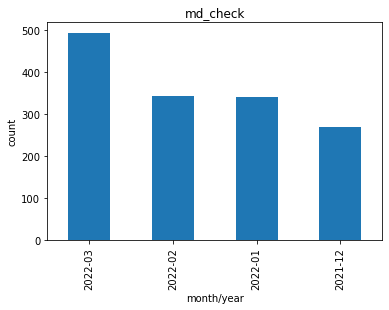

In [10]:
md_check = cnn_combined['month_year'].value_counts().plot(kind='bar')
md_check.set_title("md_check")
md_check.set_xlabel("month/year")
md_check.set_ylabel("count")

Creating a wordcloud to show change in headlines over the timeframe

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['the', 'says', 'say', 'a'] # add custom stopwords
stopwords_tokenized = nltk.word_tokenize(' '.join(stopwords))

mask = np.array(Image.open(r'C:\Users\zach\Images\CNNlogo2.jpg'))

def process(text):
    tokens = []
    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            token = word.lower().replace("'", "") # put words like 'she and she as one
            if ('covid-19' in token) or ('coronavirus' in token): # publications use different terms for covid
                tokens.append('covid') # normalize all the mentions since this is a crucial topic as of now
            else:
                tokens.append(token)
    tokens_filtered = [t for t in tokens 
                       if re.search('[a-zA-Z]', t) and t not in stopwords_tokenized]
    return tokens_filtered
  
def gen_wc(bag, name=''):
    tokens = process(bag)
    plt.figure(figsize=(20,10), dpi=800)
    wc = WordCloud(background_color='#CC0000', mask=mask, color_func=lambda *args, **kwargs: "white", 
                   width=1000, height=500, random_state=42, max_words=650, repeat=False) #other options like max_font_size=, max_words= 
    wordcloud = wc.generate_from_text(' '.join(tokens))
    plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
    plt.axis("off")
    plt.title('CNN Headlines-{}'.format(name))
    plt.savefig('CNN_headline_wc_{}'.format(name)+'.png', figsize=(20,10), dpi=800)
    plt.show()

# generate word cloud for each month
for time in cnn_combined['month_year'].unique():
    cnn_combined_subset = cnn_combined[cnn_combined['month_year']==time].copy()
    bag = cnn_combined['title'].str.cat(sep = ' ')
    gen_wc(bag, name=time)

C:\Users\zach\AppData\Local\Temp\ipykernel_11172\1207497689.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CNN_headline_wc_{}'.format(name)+'.png', figsize=(20,10), dpi=800)


Creating Change over time dataframe (Headlines Only)

In [12]:
bag = cnn_combined['title'].str.cat(sep = ' ')
tokens = process(bag)
word_df = pd.DataFrame.from_dict(dict(Counter(tokens)), orient='index', columns=['month_year'])
# create a custom merge
def merge(cnn_combined, frames):
    out = cnn_combined
    for df in frames:
        out = out.merge(cnn_combined, how='left', left_index=True, right_index=True)
    return out
frames = []
for time in cnn_combined['month_year'].unique()[::-1]: # in reverse (chronological) order
    cnn_combined_subset = cnn_combined[cnn_combined['month_year']==time].copy()
    bag = cnn_combined_subset['title'].str.cat(sep = ' ')
    tokens = process(bag)
    frames.append(pd.DataFrame.from_dict(dict(Counter(tokens)), orient='index', columns=[str(time)]))
end_cnn = merge(word_df, frames)
end_cnn = end_cnn.fillna(0)

C:\Users\zach\AppData\Local\Temp\ipykernel_11172\1794650086.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'month_year_x'} in the result is deprecated and will raise a MergeError in a future version.
  out = out.merge(cnn_combined, how='left', left_index=True, right_index=True)


In [13]:
end_cnn.head()

month_year_x  month_year_y  month_year_x  month_year_y  month_year
justice                2             2             2             2           2
department             8             8             8             8           8
charges                2             2             2             2           2
people                16            16            16            16          16
helping                4             4             4             4           4

<p style="text-align: center">
  <img  src="CNN_headline_wc_2022-03.png" width="1000" alt="Amazon CloudFront">
</p>

Exporting for Lexical Analysis

In [14]:
end_cnn.to_csv (r'C:\Users\zach\cnn_.csv', header=True)

In [15]:
out = []
for title in list(cnn_combined['title']):
    out.append(nltk.word_tokenize(title))
bi = []
for title_words in out:
    bi += nltk.bigrams(title_words)
Counter(bi).most_common()

[(('of', 'the'), 65),
 (('Biden', "'s"), 41),
 (('Here', "'s"), 39),
 (('Russia', "'s"), 36),
 (('in', 'the'), 33),
 (('to', 'know'), 31),
 (('the', 'US'), 31),
 (('the', 'Union'), 28),
 (('State', 'of'), 27),
 (('Putin', "'s"), 27),
 (('things', 'to'), 26),
 (('to', 'the'), 26),
 (('5', 'things'), 24),
 (('Biden', 'administration'), 24),
 ((',', 'but'), 24),
 (('.', 'Here'), 23),
 (('know', 'for'), 22),
 ((',', "'"), 21),
 (("'", ':'), 21),
 (('wo', "n't"), 20),
 (('White', 'House'), 18),
 (("'s", 'what'), 17),
 (('for', 'a'), 17),
 (('to', 'be'), 17),
 (('on', 'Russia'), 17),
 (('China', "'s"), 16),
 (('Joe', 'Biden'), 16),
 (('for', 'the'), 15),
 (('Boris', 'Johnson'), 15),
 (('gas', 'prices'), 15),
 (('Omicron', 'variant'), 15),
 (('on', 'the'), 15),
 (('in', 'Russia'), 15),
 (('US', 'and'), 14),
 (('on', 'Russian'), 14),
 (('supply', 'chain'), 13),
 (('.', 'But'), 13),
 (('out', 'of'), 13),
 (('the', 'pandemic'), 12),
 (("'s", 'why'), 12),
 (('in', '2022'), 12),
 (('Supreme', 'Cou